## Imports

In [148]:
import pandas as pd
import numpy as np
import re
import sys

from sklearn import preprocessing
from sklearn import naive_bayes
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix

sys.path.append("..")
from preprocessing.preprocessor import Preprocessor
from datasets.fake_news_detection import FakeNewsDetectionDataset



## Inspect test and train datasets

In [2]:
train = pd.read_csv('../raw_data/fulltrain.csv', header=None)
test = pd.read_csv('../raw_data/balancedtest.csv', header=None)
train.columns=['Labels', 'News']
test.columns=['Labels', 'News']
print(train.head())
print(test.head())

   Labels                                               News
0       1  A little less than a decade ago, hockey fans w...
1       1  The writers of the HBO series The Sopranos too...
2       1  Despite claims from the TV news outlet to offe...
3       1  After receiving 'subpar' service and experienc...
4       1  After watching his beloved Seattle Mariners pr...
   Labels                                               News
0       1  When so many actors seem content to churn out ...
1       1   In what football insiders are calling an unex...
2       1  In a freak accident following Game 3 of the N....
3       1  North Koreas official news agency announced to...
4       1  The former Alaska Governor Sarah Palin would b...


3    17870
1    14047
4     9995
2     6942
Name: Labels, dtype: int64


<AxesSubplot:title={'center':'Distribution of train labels'}>

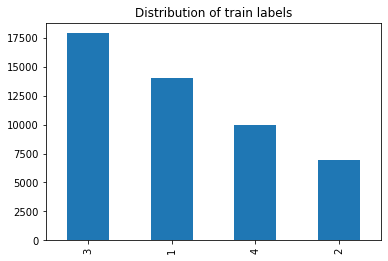

In [3]:
print(train['Labels'].value_counts())
train['Labels'].value_counts().plot(kind = 'bar', title = 'Distribution of train labels')
##Imbalanced dataset

1    750
2    750
3    750
4    750
Name: Labels, dtype: int64


<AxesSubplot:title={'center':'Distribution of test labels'}>

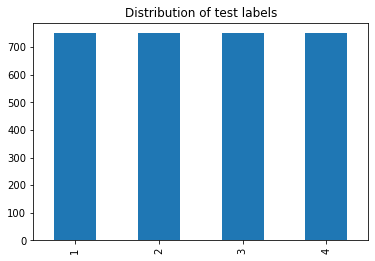

In [4]:
print(test['Labels'].value_counts())
test['Labels'].value_counts().plot(kind = 'bar', title = 'Distribution of test labels')

## Use Preprocessor to Preprocess Data

In [5]:
# Control which linguistic preprocessing steps should run.
preprocessor_none = Preprocessor(perform_case_folding=False,
                            remove_stop_words=False,
                            remove_punctuation=False,
                            perform_lemmatization=False,
                            perform_stemming=False)
preprocessor_stop = Preprocessor(perform_case_folding=False,
                            remove_stop_words=True,
                            remove_punctuation=False,
                            perform_lemmatization=False,
                            perform_stemming=False)
preprocessor_punc = Preprocessor(perform_case_folding=False,
                            remove_stop_words=False,
                            remove_punctuation=True,
                            perform_lemmatization=False,
                            perform_stemming=False)
preprocessor_case = Preprocessor(perform_case_folding=True,
                            remove_stop_words=False,
                            remove_punctuation=False,
                            perform_lemmatization=False,
                            perform_stemming=False)
preprocessor_stop_case = Preprocessor(perform_case_folding=True,
                            remove_stop_words=True,
                            remove_punctuation=False,
                            perform_lemmatization=False,
                            perform_stemming=False)
preprocessor_stop_punc = Preprocessor(perform_case_folding=False,
                            remove_stop_words=True,
                            remove_punctuation=True,
                            perform_lemmatization=False,
                            perform_stemming=False)
preprocessor_punc_case = Preprocessor(perform_case_folding=True,
                            remove_stop_words=False,
                            remove_punctuation=True,
                            perform_lemmatization=False,
                            perform_stemming=False)
preprocessor_stop_punc_case = Preprocessor(perform_case_folding=True,
                            remove_stop_words=True,
                            remove_punctuation=True,
                            perform_lemmatization=False,
                            perform_stemming=False)
preprocessor_case_stem = Preprocessor(perform_case_folding=True,
                            remove_stop_words=False,
                            remove_punctuation=False,
                            perform_lemmatization=False,
                            perform_stemming=True)
preprocessor_case_lemma = Preprocessor(perform_case_folding=True,
                            remove_stop_words=False,
                            remove_punctuation=False,
                            perform_lemmatization=True,
                            perform_stemming=False)

def join(list):
    string = ""
    for word in list:
        string = string + word + " "
    return string.rstrip()

## All permutations of preprocessing

In [155]:
x_train_none = train['News'].apply(lambda x : join(preprocessor_none.process(x)))
x_test_none = test['News'].apply(lambda x : join(preprocessor_none.process(x)))
x_train_punc = train['News'].apply(lambda x : join(preprocessor_punc.process(x)))
x_test_punc = test['News'].apply(lambda x : join(preprocessor_punc.process(x)))
x_train_case = train['News'].apply(lambda x: join(preprocessor_case.process(x)))
x_test_case = test['News'].apply(lambda x: join(preprocessor_case.process(x)))
x_train_stop = train['News'].apply(lambda x: join(preprocessor_stop.process(x)))
x_test_stop = test['News'].apply(lambda x: join(preprocessor_stop.process(x)))

In [173]:
x_train_stop_case = train['News'].apply(lambda x: join(preprocessor_stop_case.process(x)))
x_test_stop_case = test['News'].apply(lambda x: join(preprocessor_stop_case.process(x)))
x_train_stop_punc = train['News'].apply(lambda x: join(preprocessor_stop_punc.process(x)))
x_test_stop_punc = test['News'].apply(lambda x: join(preprocessor_stop_punc.process(x)))
x_train_punc_case = train['News'].apply(lambda x: join(preprocessor_punc_case.process(x)))
x_test_punc_case = test['News'].apply(lambda x: join(preprocessor_punc_case.process(x)))
x_train_stop_punc_case = train['News'].apply(lambda x: join(preprocessor_stop_punc_case.process(x)))
x_test_stop_punc_case = test['News'].apply(lambda x: join(preprocessor_stop_punc_case.process(x)))

In [153]:
x_train_case_stem = train['News'].apply(lambda x : join(preprocessor_case_stem.process(x)))
x_test_case_stem = test['News'].apply(lambda x : join(preprocessor_case_stem.process(x)))

In [154]:
x_train_case_lemma = train['News'].apply(lambda x : join(preprocessor_case_lemma.process(x)))
x_test_case_lemma = test['News'].apply(lambda x : join(preprocessor_case_lemma.process(x)))

In [29]:
print(x_test_punc)

0       When so many actors seem content to churn out ...
1       In what football insiders are calling an unexp...
2       In a freak accident following Game 3 of the N....
3       North Koreas official news agency announced to...
4       The former Alaska Governor Sarah Palin would b...
                              ...                        
2995    The Air Force mistakenly gave rival companies ...
2996    The United Nations climate chief on Friday cha...
2997    River Plate midfielder Diego Buonanotte has un...
2998    Lawmakers were on the brink Tuesday of exempti...
2999    The Pentagon which is processing bids on a new...
Name: News, Length: 3000, dtype: object


## Feature Engineering

In [9]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train['Labels'])
test_y = encoder.fit_transform(test['Labels'])

In [249]:
X_train = x_train_case
X_test = x_test_case

In [150]:
print(X_train)

0        a little less than a decade ago , hockey fans ...
1        the writers of the hbo series the sopranos too...
2        despite claims from the tv news outlet to offe...
3        after receiving 'subpar ' service and experien...
4        after watching his beloved seattle mariners pr...
                               ...                        
48849    the ruling kuomintang ( kmt ) has claimed owne...
48850    the taipei city government has encouraged the ...
48851    president ma ying-jeou said friday that a park...
48852    the families of the four people who were kille...
48853    the ministry of finance will make public on sa...
Name: News, Length: 48854, dtype: object


#### Count Vectorizer

In [250]:
count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', lowercase=False)
count_vectorizer.fit(X_train)
x_train_count = count_vectorizer.transform(X_train)
x_test_count = count_vectorizer.transform(X_test)

#### Tfidf Vectorizer - Word / Unigram

In [251]:
tfidf_vectorizer_word = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=10000, lowercase=False)
tfidf_vectorizer_word.fit(X_train)
x_train_tfidf_word = tfidf_vectorizer_word.transform(X_train)
x_test_tfidf_word = tfidf_vectorizer_word.transform(X_test)

#### Tfidf Vectorizer - Bigrams

In [264]:
tfidf_vectorizer_bigram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,2), max_features=25000, lowercase=False)
tfidf_vectorizer_bigram.fit(X_train)
x_train_tfidf_bigram = tfidf_vectorizer_bigram.transform(X_train)
x_test_tfidf_bigram = tfidf_vectorizer_bigram.transform(X_test)

#### Tfidf Vectorizer - Unigrams and Bigrams

In [252]:
tfidf_vectorizer_ngram2 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=25000, lowercase=False)
tfidf_vectorizer_ngram2.fit(X_train)
x_train_tfidf_ngram2 = tfidf_vectorizer_ngram2.transform(X_train)
x_test_tfidf_ngram2 = tfidf_vectorizer_ngram2.transform(X_test)

#### Tfidf Vectorizer - Unigrams and Bigrams and Trigrams

In [14]:
'''
tfidf_vectorizer_ngram3 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=27500)
tfidf_vectorizer_ngram3.fit(X_train)
x_train_tfidf_ngram3 = tfidf_vectorizer_ngram3.transform(X_train)
x_test_tfidf_ngram3 = tfidf_vectorizer_ngram3.transform(X_test)

KeyboardInterrupt: 

#### Tfidf Vectorizer - Char Ngram(1, 2)

In [27]:
'''
##Not feasible -- Too little information
tfidf_vectorizer_char = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=5000)
tfidf_vectorizer_char.fit(X_train)
x_train_tfidf_char = tfidf_vectorizer_char.transform(X_train)
x_test_tfidf_char = tfidf_vectorizer_char.transform(X_test)

C:\Users\viveg\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [20]:
print(metrics.f1_score([2]*len(test_y), test_y, average='macro'))
print(metrics.accuracy_score([2]*len(test_y), test_y))

0.1
0.25


In [180]:
#Hyperparameter set constant to 1 (the default value):
alpha_value=1

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def predict(model, X_valid):
    y_pred = model.predict(X_valid)
    return y_pred

In [246]:
naive_bayes_count_model = train_model(naive_bayes.MultinomialNB(alpha=alpha_value), x_train_count, train_y)
y_pred_nb_count = predict(naive_bayes_count_model, x_test_count)
nb_count_f1_score = metrics.f1_score(y_pred_nb_count, test_y, average='macro')
nb_count_accuracy_score = metrics.accuracy_score(y_pred_nb_count, test_y)
print("Count vectorizer f1_score is " + str(nb_count_f1_score))
print("Count vectorizer accuracy is " + str(nb_count_accuracy_score))

Count vectorizer f1_score is 0.6665350822689343
Count vectorizer accuracy is 0.6806666666666666


In [ ]:

'''
New preprocessor:
No preprocessing:
Count vectorizer f1_score is 0.6605962257434558
Count vectorizer accuracy is 0.676
Punctuation removed:
Count vectorizer f1_score is 0.6608669114101966
Count vectorizer accuracy is 0.6763333333333333
Case folding:
Count vectorizer f1_score is 0.6652860068024109
Count vectorizer accuracy is 0.6793333333333333
Stopwords removed:
Count vectorizer f1_score is 0.6505969425554999
Count vectorizer accuracy is 0.6623333333333333
Stopwords removed and case folding:
Count vectorizer f1_score is 0.6618306648177975
Count vectorizer accuracy is 0.6736666666666666
Punctuation removed and case folding:
Count vectorizer f1_score is 0.6658490233722193
Count vectorizer accuracy is 0.68
Stopwords and pucntuation removed:
Count vectorizer f1_score is 0.6508342891131483
Count vectorizer accuracy is 0.6626666666666666
Stopwords removed and punctuation removed and case folding:
Count vectorizer f1_score is 0.6623934412247338
Count vectorizer accuracy is 0.6743333333333333
Stemmed with case folding:
Count vectorizer f1_score is 0.6627021965987446
Count vectorizer accuracy is 0.675
Lemmatized with case folding:
Count vectorizer f1_score is 0.6665350822689343
Count vectorizer accuracy is 0.6806666666666666
'''

In [247]:
naive_bayes_tfidf_word_model = train_model(naive_bayes.MultinomialNB(alpha=alpha_value), x_train_tfidf_word, train_y)
y_pred_nb_tfidf_word = predict(naive_bayes_tfidf_word_model, x_test_tfidf_word)
nb_tfidf_word_f1_score = metrics.f1_score(y_pred_nb_tfidf_word, test_y, average='macro')
nb_tfidf_word_accuracy_score = metrics.accuracy_score(y_pred_nb_tfidf_word, test_y)
print("Tfidf word f1_score is " + str(nb_tfidf_word_f1_score))
print("Tfidf word accuracy is " + str(nb_tfidf_word_accuracy_score))

Tfidf word f1_score is 0.6793754330291637
Tfidf word accuracy is 0.683


In [77]:

'''
New preprocessor:
No preprocessing:
Tfidf word f1_score is 0.6863827846238891
Tfidf word accuracy is 0.6893333333333334
Case folding:
Tfidf word f1_score is 0.6845608624697852
Tfidf word accuracy is 0.688
Stopword removal:
Tfidf word f1_score is 0.6888903971314111
Tfidf word accuracy is 0.6903333333333334
Punctuation removal:
Tfidf word f1_score is 0.6863827846238891
Tfidf word accuracy is 0.6893333333333334
Stopword removal with case folding:
Tfidf word f1_score is 0.6838634571798237
Tfidf word accuracy is 0.6856666666666666
Punctuation removal with case folding:
Tfidf word f1_score is 0.6845608624697852
Tfidf word accuracy is 0.688
Stopword and punctuation removal:
Tfidf word f1_score is 0.6888903971314111
Tfidf word accuracy is 0.6903333333333334
Stopword and punctuation removal with case folding:
Tfidf word f1_score is 0.6834935161682985
Tfidf word accuracy is 0.6853333333333333
Stemmed with case folding:
Tfidf word f1_score is 0.6693093278147153
Tfidf word accuracy is 0.673
Lemmatized with case folding:
Tfidf word f1_score is 0.6793754330291637
Tfidf word accuracy is 0.683



'''

'\nStopwords removed and punctuation removed:\nTfidf word f1_score is3 0.6834935161682985\nTfidf word accuracy is3 0.6853333333333333\nStopwords removed:\nTfidf word f1_score is3 0.6838634571798237\nTfidf word accuracy is3 0.6856666666666666\nNo preprocessing:\nTfidf word f1_score is3 0.6845608624697852\nTfidf word accuracy is3 0.688\nLower case:\nTfidf word f1_score is3 0.6845608624697852\nTfidf word accuracy is3 0.688\nPunctuation removed:\nTfidf word f1_score is3 0.6845608624697852\nTfidf word accuracy is3 0.688\n\n'

In [253]:
naive_bayes_tfidf_ngram2_model = train_model(naive_bayes.MultinomialNB(alpha=alpha_value), x_train_tfidf_ngram2, train_y)
y_pred_nb_tfidf_ngram2 = predict(naive_bayes_tfidf_ngram2_model, x_test_tfidf_ngram2)
nb_tfidf_ngram2_f1_score = metrics.f1_score(y_pred_nb_tfidf_ngram2, test_y, average='macro')
nb_tfidf_ngram2_accuracy_score = metrics.accuracy_score(y_pred_nb_tfidf_ngram2, test_y)
print("Tfidf ngram2 f1_score is " + str(nb_tfidf_ngram2_f1_score))
print("Tfidf ngram2 accuracy is " + str(nb_tfidf_ngram2_accuracy_score))

Tfidf ngram2 f1_score is 0.69442532067018
Tfidf ngram2 accuracy is 0.6983333333333334


In [203]:
'''
New preprocessor:
No preprocessing (25K):
Tfidf ngram2 f1_score is 0.6861357773512551
Tfidf ngram2 accuracy is 0.6903333333333334
Case folding:
Tfidf ngram2 f1_score is 0.69442532067018
Tfidf ngram2 accuracy is 0.6983333333333334
Stopword removal:
Tfidf ngram2 f1_score is 0.6823236331722874
Tfidf ngram2 accuracy is 0.6833333333333333
Punctuation removal:
Tfidf ngram2 f1_score is 0.6858057709556158
Tfidf ngram2 accuracy is 0.69
Stopword removal with case folding:
Tfidf ngram2 f1_score is 0.6856204471229342
Tfidf ngram2 accuracy is 0.687
Punctuation removal with case folding:
Tfidf ngram2 f1_score is 0.6944109047073916
Tfidf ngram2 accuracy is 0.6983333333333334
Stopword and punctuation removal:
Tfidf ngram2 f1_score is 0.6819949511926823
Tfidf ngram2 accuracy is 0.683
Stopword and punctuation removal with case folding:
Tfidf ngram2 f1_score is 0.6862762490000844
Tfidf ngram2 accuracy is 0.6876666666666666
Stemmed with case folding:
Tfidf ngram2 f1_score is 0.6819228180583291
Tfidf ngram2 accuracy is 0.686
Lemmatized with case folding:
Tfidf ngram2 f1_score is 0.6909527289726216
Tfidf ngram2 accuracy is 0.695


Case folding
22.5K:
Tfidf ngram2 f1_score is3 0.6934778512658694
Tfidf ngram2 accuracy is3 0.6973333333333334
25K:
Tfidf ngram2 f1_score is 0.69442532067018
Tfidf ngram2 accuracy is 0.6983333333333334
27.5K:
Tfidf ngram2 f1_score is 0.6922133381924681
Tfidf ngram2 accuracy is 0.6963333333333334
'''

'\nNew preprocessor:\nNo preprocessing (25K):\nTfidf ngram2 f1_score is 0.6861357773512551\nTfidf ngram2 accuracy is 0.6903333333333334\nCase folding:\nTfidf ngram2 f1_score is 0.69442532067018\nTfidf ngram2 accuracy is 0.6983333333333334\nStopword removal:\n\n\nStopwords removed and lowercase:\nTfidf ngram2 f1_score is 0.6871153451437382\nTfidf ngram2 accuracy is 0.6883333333333334\nStopwords removed and punctuation removed and lowercase:\nTfidf ngram2 f1_score is 0.6874877737745918\nTfidf ngram2 accuracy is 0.6886666666666666\nPunctuation removed and lowercase:\nTfidf ngram2 f1_score is3 0.6927363814682612\nTfidf ngram2 accuracy is3 0.6966666666666667\n\nLower case (22.5K):\nTfidf ngram2 f1_score is3 0.6934778512658694\nTfidf ngram2 accuracy is3 0.6973333333333334\n25K:\nTfidf ngram2 f1_score is 0.69442532067018\nTfidf ngram2 accuracy is 0.6983333333333334\n27.5K:\nTfidf ngram2 f1_score is 0.6922133381924681\nTfidf ngram2 accuracy is 0.6963333333333334\n'

In [265]:
naive_bayes_tfidf_bigram_model = train_model(naive_bayes.MultinomialNB(alpha=alpha_value), x_train_tfidf_bigram, train_y)
y_pred_nb_tfidf_bigram = predict(naive_bayes_tfidf_bigram_model, x_test_tfidf_bigram)
nb_tfidf_bigram_f1_score = metrics.f1_score(y_pred_nb_tfidf_bigram, test_y, average='macro')
nb_tfidf_bigram_accuracy_score = metrics.accuracy_score(y_pred_nb_tfidf_bigram, test_y)
print("Tfidf bigram f1_score is " + str(nb_tfidf_bigram_f1_score))
print("Tfidf bigram accuracy is " + str(nb_tfidf_bigram_accuracy_score))

Tfidf bigram f1_score is 0.6474050032384886
Tfidf bigram accuracy is 0.654


In [1]:
naive_bayes_tfidf_ngram3_model = train_model(naive_bayes.MultinomialNB(alpha=alpha_value), x_train_tfidf_ngram3, train_y)
y_pred_nb_tfidf_ngram3 = predict(naive_bayes_tfidf_ngram3_model, x_test_tfidf_ngram3)
nb_tfidf_ngram3_f1_score = metrics.f1_score(y_pred_nb_tfidf_ngram3, test_y, average='macro')
nb_tfidf_ngram3_accuracy_score = metrics.accuracy_score(y_pred_nb_tfidf_ngram3, test_y)
print("Tfidf ngram3 f1_score is " + str(nb_tfidf_ngram3_f1_score))
print("Tfidf ngram3 accuracy is " + str(nb_tfidf_ngram3_accuracy_score))

NameError: name 'train_model' is not defined

In [28]:
naive_bayes_tfidf_char_model = train_model(naive_bayes.MultinomialNB(alpha=alpha_value), x_train_tfidf_char, train_y)
y_pred_nb_tfidf_char = predict(naive_bayes_tfidf_char_model, x_test_tfidf_char)
nb_tfidf_char_f1_score = metrics.f1_score(y_pred_nb_tfidf_char, test_y, average='macro')
nb_tfidf_char_accuracy_score = metrics.accuracy_score(y_pred_nb_tfidf_char, test_y)
print("Tfidf char f1_score is " + str(nb_tfidf_char_f1_score))
print("Tfidf char accuracy is " + str(nb_tfidf_char_accuracy_score))

Tfidf char f1_score is 0.17134910257328878
Tfidf char accuracy is 0.21066666666666667


In [ ]:
'''
Tfidf char f1 and accuracy scores:
Stopwords and contractions removed:
Tfidf char f1_score is 0.17134910257328878
Tfidf char accuracy is 0.21066666666666667
'''

In [254]:
##Best Result of Feature Engineering:
best_x_train = x_train_tfidf_ngram2
best_y_train = train_y
best_x_test = x_test_tfidf_ngram2
best_y_test = test_y


In [259]:
#Tune hyperparameter alpha
alpha_value = 0.45

best_model = train_model(naive_bayes.MultinomialNB(alpha=alpha_value), best_x_train, best_y_train)
best_y_pred = predict(best_model, best_x_test)
best_f1_score = metrics.f1_score(best_y_pred, best_y_test, average='macro')
best_accuracy_score = metrics.accuracy_score(best_y_pred, best_y_test)
print("Tfidf ngram2 f1_score is " + str(best_f1_score))
print("Tfidf ngram2 accuracy is " + str(best_accuracy_score))


Tfidf ngram2 f1_score is 0.6991832045205303
Tfidf ngram2 accuracy is 0.7023333333333334


In [45]:

'''
0.3
Tfidf ngram2 f1_score is 0.6974093796857893
Tfidf ngram2 accuracy is 0.7006666666666667
0.4
Tfidf ngram2 f1_score is 0.698566213517513
Tfidf ngram2 accuracy is 0.7016666666666667
0.45
Tfidf ngram2 f1_score is 0.6991832045205303
Tfidf ngram2 accuracy is 0.7023333333333334
0.5
Tfidf ngram2 f1_score is 0.6988528321133809
Tfidf ngram2 accuracy is 0.702
0.6
Tfidf ngram2 f1_score is 0.6987096514753162
Tfidf ngram2 accuracy is 0.702
0.7
Tfidf ngram2 f1_score is 0.6978413908116609
Tfidf ngram2 accuracy is 0.7013333333333334
0.8
Tfidf ngram2 f1_score is 0.6960006445411058
Tfidf ngram2 accuracy is 0.6996666666666667
0.9 
Tfidf ngram2 f1_score is 0.6948857836771832
Tfidf ngram2 accuracy is 0.6986666666666667
1.0
Tfidf ngram2 f1_score is 0.69442532067018
Tfidf ngram2 accuracy is 0.6983333333333334
2.0
Tfidf ngram2 f1_score is 0.663420089611259
Tfidf ngram2 accuracy is 0.673
3.0
Tfidf ngram2 f1_score is 0.6361571109560435
Tfidf ngram2 accuracy is 0.655
'''

'\n0.5\nTfidf ngram2 f1_score is 0.6955135766467679\nTfidf ngram2 accuracy is 0.699\n'

In [261]:
##alpha = 0.45
print(classification_report(best_y_test, best_y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.644     0.687     0.665       750
           1      0.724     0.507     0.596       750
           2      0.633     0.829     0.718       750
           3      0.853     0.787     0.818       750

    accuracy                          0.702      3000
   macro avg      0.713     0.702     0.699      3000
weighted avg      0.713     0.702     0.699      3000

